In [3]:
# Disney Reviews – Cluster Insights
# Focused analysis of LLM-labeled clusters for actionable CX recommendations

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_colwidth", 200)
sns.set_theme(style="whitegrid")

In [4]:
# Load the labeled reviews parquet
df = pd.read_parquet("clustering_out/reviews_with_clusters_labeled.parquet")

# Quick peek
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,emb_index,Year,Month,Season,cluster_mbk,cluster_mbk_label,keywords,sentiment,summary,actions,confidence
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small Wor...,Disneyland_HongKong,0,2019.0,4.0,Spring,28,Crowd Management,"crowds, queues, experience, frustration",negative,Visitors experienced frustration with crowd management and long wait times for rides. Suggestions for improvement include better queue systems and crowd control.,"[Visit during off-peak times, Utilize FastPass for popular rides, Plan breaks to avoid exhaustion]",80
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironm...",Disneyland_HongKong,1,2019.0,5.0,Spring,46,Crowd Management,"crowds, queues, experience, frustration",negative,Visitors experienced frustration with crowd management and long wait times for rides. Suggestions for improvement include better queue systems and crowd control.,"[Visit during off-peak times, Utilize FastPass for popular rides, Plan breaks to avoid exhaustion]",80
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately ...,Disneyland_HongKong,2,2019.0,4.0,Spring,32,Experience Comparison,"comparison, expectations, experience, disappointment",negative,"Visitors often compare Disneyland Paris unfavorably to other Disney parks, citing fewer attractions and a less magical experience.","[Manage expectations before visiting, Consider visiting other Disney parks, Plan for potential ride closures]",70
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midwee...,Disneyland_HongKong,3,2019.0,4.0,Spring,46,Crowd Management,"crowds, queues, experience, frustration",negative,Visitors experienced frustration with crowd management and long wait times for rides. Suggestions for improvement include better queue systems and crowd control.,"[Visit during off-peak times, Utilize FastPass for popular rides, Plan breaks to avoid exhaustion]",80
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",Disneyland_HongKong,4,2019.0,4.0,Spring,11,Accessibility Issues,"accessibility, queues, experience, frustration",negative,Some visitors faced accessibility issues and frustrations with the queueing system. Improvements are needed to enhance the experience for all guests.,"[Inquire about accessibility options before visiting, Plan for potential wait times, Provide feedback to park management]",70


In [6]:
# Aggregate stats by cluster label
cluster_summary = (
    df.groupby("cluster_mbk_label")
    .agg(
        count=("Review_ID", "size"),
        avg_rating=("Rating", "mean"),
        pos_share=("Rating", lambda s: (s >= 4).mean())
    )
    .reset_index()
    .sort_values("count", ascending=False)
)

cluster_summary.head(10)

,cluster_mbk_label,count,avg_rating,pos_share
21,Park Maintenance,3533,4.339938,0.831022
4,Crowd Management,3199,4.411379,0.852766
18,Overall Experience,2989,4.019739,0.729341
22,Park Size,2884,4.082178,0.750000
9,Family Experience,2797,4.624955,0.931355
0,Accessibility Experience,2765,4.708137,0.966365
12,Food Quality,2721,3.862918,0.682837
8,Experience Comparison,2404,4.550333,0.911398
20,Park Atmosphere,2283,3.924223,0.684625
11,Family Fun,1622,4.394575,0.903822


C:\Users\dorgo\AppData\Local\Temp\ipykernel_21084\4220758779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary.head(10), x="count", y="cluster_mbk_label", palette="viridis")


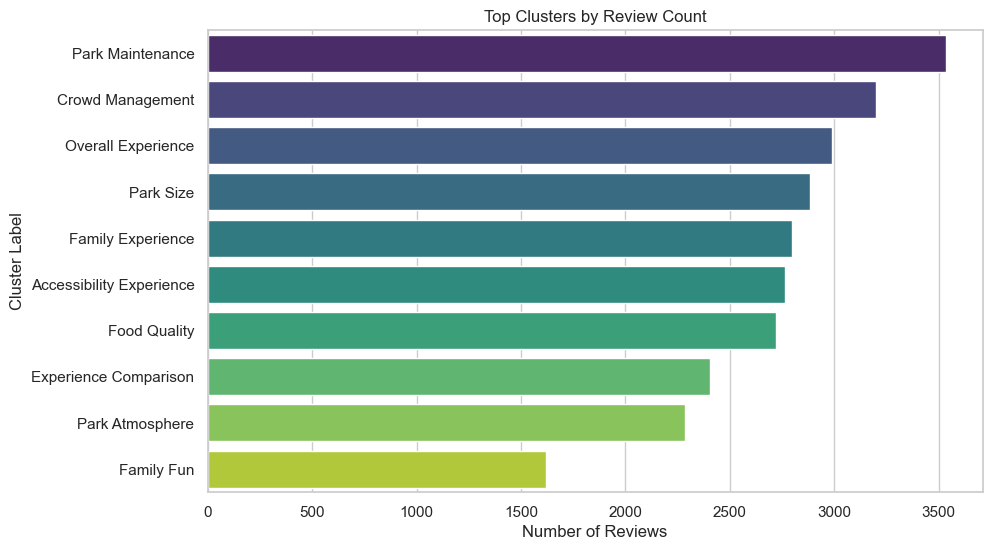

In [8]:
# Bar chart of top clusters by volume
plt.figure(figsize=(10,6))
sns.barplot(data=cluster_summary.head(10), x="count", y="cluster_mbk_label", palette="viridis")
plt.title("Top Clusters by Review Count")
plt.xlabel("Number of Reviews")
plt.ylabel("Cluster Label")
plt.show()

In [11]:
top_clusters = cluster_summary.head(5)["cluster_mbk_label"].tolist()

for cl in top_clusters:
    print("="*80)
    print(f"📌 Cluster: {cl}")
    sub = df[df["cluster_mbk_label"] == cl]

    # Basic stats
    print(f"- Reviews: {len(sub)}")
    print(f"- Avg rating: {sub['Rating'].mean():.2f}")
    print(f"- Positive share (≥4⭐): {(sub['Rating']>=4).mean():.1%}")

    # Breakdown by park
    print("\nBy Park:")
    display(sub.groupby("Branch")["Rating"].mean().round(2))

    # Show a few sample reviews
    print("\nSample Reviews:")
    for txt in sub["Review_Text"].dropna().head(3).tolist():
        print(f" - {txt[:200]}...")


📌 Cluster: Park Maintenance
- Reviews: 3533
- Avg rating: 4.34
- Positive share (≥4⭐): 83.1%

By Park:


Branch
Disneyland_California    4.49
Disneyland_HongKong      3.76
Disneyland_Paris         4.01
Name: Rating, dtype: float64


Sample Reviews:
 - It s Disneyland! It just does not need reviewing! Place speaks for itself. However smaller than I expected. Great experience...
 - Disneylands the world over are generic apart from the language. This was no different than the others. It was a shame about all the building work and some closed eating areas. Definitely worth a visit...
 - It was ok. This Disney is more catered for smaller children rather than adults. Some of the areas were closed. There was only one really thrilling ride. the rest are for children. Maybe needs a few mo...
📌 Cluster: Crowd Management
- Reviews: 3199
- Avg rating: 4.41
- Positive share (≥4⭐): 85.3%

By Park:


Branch
Disneyland_California    4.84
Disneyland_HongKong      4.20
Disneyland_Paris         4.73
Name: Rating, dtype: float64


Sample Reviews:
 - If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World i...
 - Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman ....
 - HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, i...
📌 Cluster: Overall Experience
- Reviews: 2989
- Avg rating: 4.02
- Positive share (≥4⭐): 72.9%

By Park:


Branch
Disneyland_California    3.98
Disneyland_HongKong      4.04
Disneyland_Paris         4.13
Name: Rating, dtype: float64


Sample Reviews:
 - Around 60 per person and if you want to eat or drink at any point it was cost you a small fortune. If you go on a week day like we did I assume like us you will wait around half an hour per ride. At t...
 - Took a five year old and a two year old. Could not fault anything other than a hire pram being pinched, which was quickly replaced. Staff amazing. If you can stay at one of the hotels, do so. Makes it...
 - To be honest it rained nearly all day, if the weather was better i'm sure my overall impression would have been much better. It lacks the thrill seeking rides of other disney parks. That being said it...
📌 Cluster: Park Size
- Reviews: 2884
- Avg rating: 4.08
- Positive share (≥4⭐): 75.0%

By Park:


Branch
Disneyland_California    4.47
Disneyland_HongKong      3.97
Disneyland_Paris         3.93
Name: Rating, dtype: float64


Sample Reviews:
 - I'm a big Disney park fan and a regular visitor to Disneyland Paris, so I was very excited to visit a new Disney park. We had a great time here, but compared to Paris, Tokyo and Florida (the others I'...
 - Magical as expected. Fairy tale! Some great themed rides, highlight for us was the Iron Man. Go for the slightly more expensive ticket that gets you priority pass, otherwise you will need to queue qui...
 - I really enjoy it. Reminder to download their apps, check out all the busy rides first and get the fast pass...
📌 Cluster: Family Experience
- Reviews: 2797
- Avg rating: 4.62
- Positive share (≥4⭐): 93.1%

By Park:


Branch
Disneyland_California    4.78
Disneyland_HongKong      4.45
Disneyland_Paris         4.43
Name: Rating, dtype: float64


Sample Reviews:
 - It was indeed the happiest place on earth! My family had really fun and it made my daughter's birthday a memorable one!...
 - We first did Disneyworld in Orlando some 40 yrs ago with our 2 year old.Back then, we had to buy different value tickets for various rides whereas that has changed and the entry fee now covers all rid...
 - It was very essay to go from the city to Disney central Station. We bought tickets on sight with the additional VIP Status so that we didn't have to line up.It was a week day and the park was not full...


In [13]:
# Compare average rating by cluster across parks
pivot = (
    df.groupby(["cluster_mbk_label", "Branch"])
    .agg(avg_rating=("Rating", "mean"))
    .reset_index()
    .pivot(index="cluster_mbk_label", columns="Branch", values="avg_rating")
)

pivot.head(10)


Branch,Disneyland_California,Disneyland_HongKong,Disneyland_Paris
cluster_mbk_label,,,
Accessibility Experience,4.742009,4.507979,4.733124
Accessibility Issues,3.666667,3.576642,3.352941
Annual Pass Holders,4.828877,4.763636,4.669291
Character Interactions,4.717092,4.293919,4.574194
Crowd Management,4.835777,4.204141,4.731818
Crowded Experience,4.726872,4.619469,4.709459
Dining Experience,4.729730,4.598425,4.577982
Disappointing Experience,1.916667,2.571429,2.234783
Experience Comparison,4.730435,4.362253,4.462079


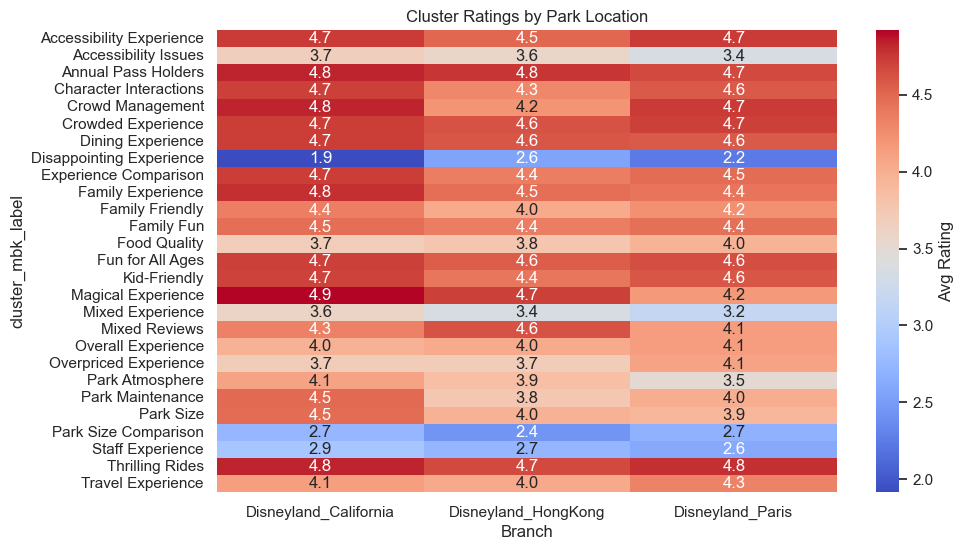

In [14]:
# Heatmap for quick comparison
plt.figure(figsize=(10,6))
sns.heatmap(pivot.fillna(0), annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Avg Rating'})
plt.title("Cluster Ratings by Park Location")
plt.show()

In [17]:
# Focus cluster
focus_cluster = "Food Quality"
food_df = df[df["cluster_mbk_label"] == focus_cluster]

print(f"📊 Food Quality cluster — {len(food_df)} reviews")
print(f"Avg Rating: {food_df['Rating'].mean():.2f}")
print(f"Positive share (≥4⭐): {(food_df['Rating']>=4).mean():.1%}")


📊 Food Quality cluster — 2721 reviews
Avg Rating: 3.86
Positive share (≥4⭐): 68.3%


In [18]:
food_by_park = (
    food_df.groupby("Branch")["Rating"]
    .agg(["count", "mean"])
    .reset_index()
    .rename(columns={"count":"n_reviews","mean":"avg_rating"})
)

food_by_park


,Branch,n_reviews,avg_rating
0,Disneyland_California,705,3.697872
1,Disneyland_HongKong,425,3.781176
2,Disneyland_Paris,1591,3.957888


C:\Users\dorgo\AppData\Local\Temp\ipykernel_21084\3808402051.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=food_by_season, x="Season", y="Rating", palette="coolwarm")


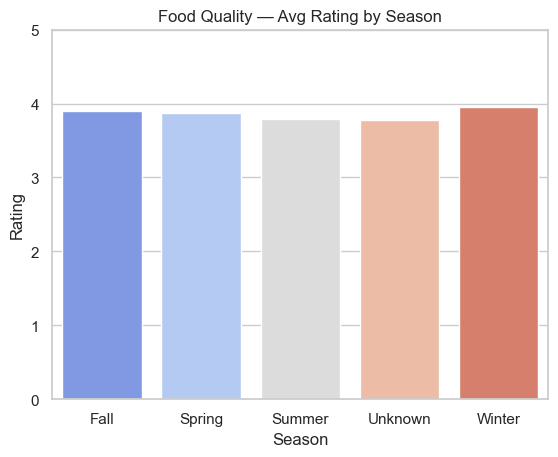

In [20]:
food_by_season = (
    food_df.groupby("Season")["Rating"]
    .mean()
    .reset_index()
    .sort_values("Season")
)

sns.barplot(data=food_by_season, x="Season", y="Rating", palette="coolwarm")
plt.title("Food Quality — Avg Rating by Season")
plt.ylim(0,5)
plt.show()


In [28]:
# Extract sample reviews from Food Quality cluster mentioning "food"
food_mentions = (
    food_df[food_df["Review_Text"].str.contains(r"\bfood\b", case=False, na=False)]
    .sample(10, random_state=42)["Review_Text"]
    .tolist()
)

for i, review in enumerate(food_mentions, 1):
    print(f"{i}. {review}\n")

1. I'd been to DLP before without kids and it was wonderful. It really became magical with small kids. It's beautifully sculpted and full of fun and interesting things to do. There is quality and attention to detail in everything. The staff were consistently freindly and helpful.We arranged our travel separately and planned to take the TGV from CDG airport but, not having booked in advance, we couldn't get tickets and had to take the bus. Having successfully taken the train back I wouldn't bother next time. The Disney shuttle was an excellent service, at least as easy to use and not really any more time consuming. If you make the most of the Extra Magic Hours (if staying in a Disney hotel) to get a lot of quieter time in the park it can be a long day. Don't be tempted to miss the closing fireworks and lights show: Disney Dreams. It is truly spectacular. The lights, the fountains, the music, the fireworks... just amazing. It's definitely worth an afternoon siesta (avoiding some of the b

## Insight: Food Quality

Our investigation shows that **food is consistently perceived as overpriced and of low quality across all parks**.
- Average ratings are low (**3.7–3.9⭐**) compared to other experience clusters.
- Review text highlights recurring complaints about **high prices, poor quality, and service issues**.
- There is a **seasonal effect**: scores dip slightly in summer and improve in winter, likely reflecting higher crowding and pressure on food service during peak periods.

### Recommendation
Disney should prioritize improvements in:
- **Cost perception**: introduce family bundles, discounts, or meal deals to improve value-for-money.
- **Food quality**: ensure freshness and consistency, especially in peak seasons.
- **Service quality**: reduce wait times for food and improve portion sizes to meet guest expectations.

Improving food offerings will have a direct positive impact on customer satisfaction and overall park experience.
